# Build Classification Models

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [2]:
df = pd.read_csv("../data/cleaned_cuisines.csv")

In [3]:
df.head(-5)

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,3985,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3986,3986,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3987,3987,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3988,3988,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Selecting the columns on which recipe 0 takes non-zero values (ingredients in the recipe)
df.iloc[0,:][df.iloc[0,:]!= 0] 

cuisine                   indian
black_mustard_seed_oil         1
cayenne                        1
coconut                        1
coconut_oil                    1
coriander                      1
cumin                          1
fenugreek                      1
fish                           1
mango                          1
pepper                         1
seed                           1
tomato                         1
turmeric                       1
Name: 0, dtype: object

In [5]:
y = df.cuisine # same as df['cuisine']

In [6]:
ingredient_cols = df.columns[2:]

In [7]:
X = df[ingredient_cols]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [9]:
clf = LogisticRegression()

In [10]:
clf.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
y_pred[:5]

array(['korean', 'thai', 'japanese', 'korean', 'chinese'], dtype=object)

In [13]:
y_test[:5]

822     chinese
3925       thai
2493    chinese
1384     korean
537     chinese
Name: cuisine, dtype: object

In [14]:
clf.predict_proba([X_test.iloc[1,:]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.25156454, 0.13026339, 0.03700535, 0.00493971, 0.57622701]])

In [15]:
clf.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

In [16]:
confusion_matrix(y_test, y_pred)

array([[131,   4,  11,  10,  16],
       [  2, 132,   5,   1,   6],
       [ 12,   2, 135,  12,   7],
       [ 18,   1,  16, 123,   7],
       [ 13,   7,   3,   2, 123]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.76      0.75       172
      indian       0.90      0.90      0.90       146
    japanese       0.79      0.80      0.80       168
      korean       0.83      0.75      0.79       165
        thai       0.77      0.83      0.80       148

    accuracy                           0.81       799
   macro avg       0.81      0.81      0.81       799
weighted avg       0.81      0.81      0.81       799



In [18]:
df.groupby('cuisine').count()

,Unnamed: 0,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,
chinese,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
indian,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
japanese,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
korean,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
thai,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799


In [19]:
X_test

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_test.iloc[100]

almond        0
angelica      0
anise         0
anise_seed    0
apple         0
             ..
wood          0
yam           0
yeast         0
yogurt        0
zucchini      0
Name: 1006, Length: 380, dtype: int64

In [21]:
X_test.iloc[0,5:10]

apple_brandy    0
apricot         0
armagnac        0
artemisia       0
artichoke       0
Name: 822, dtype: int64

## Trying out different classifiers
- K Nearest Neighbours
- Decision Trees
- Random Forests

### K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# High sensitivity to hyperparameter! Less is better (in this case)
clf = KNeighborsClassifier(n_neighbors=1) 

In [42]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_pred = clf.predict(X_test.values)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.74      0.74       172
      indian       0.85      0.84      0.85       146
    japanese       0.63      0.88      0.74       168
      korean       0.82      0.62      0.71       165
        thai       0.86      0.72      0.79       148

    accuracy                           0.76       799
   macro avg       0.78      0.76      0.76       799
weighted avg       0.78      0.76      0.76       799



In [40]:
clf.score(X_test.values, y_test)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6896120150187734

### Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [54]:
clf = DecisionTreeClassifier(max_depth=4)

In [55]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
clf.score(X_test, y_test)

0.5018773466833542

In [57]:
y_pred = clf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.31      0.44       172
      indian       0.94      0.56      0.70       146
    japanese       0.37      0.93      0.53       168
      korean       0.93      0.25      0.39       165
        thai       0.39      0.45      0.42       148

    accuracy                           0.50       799
   macro avg       0.67      0.50      0.50       799
weighted avg       0.67      0.50      0.49       799



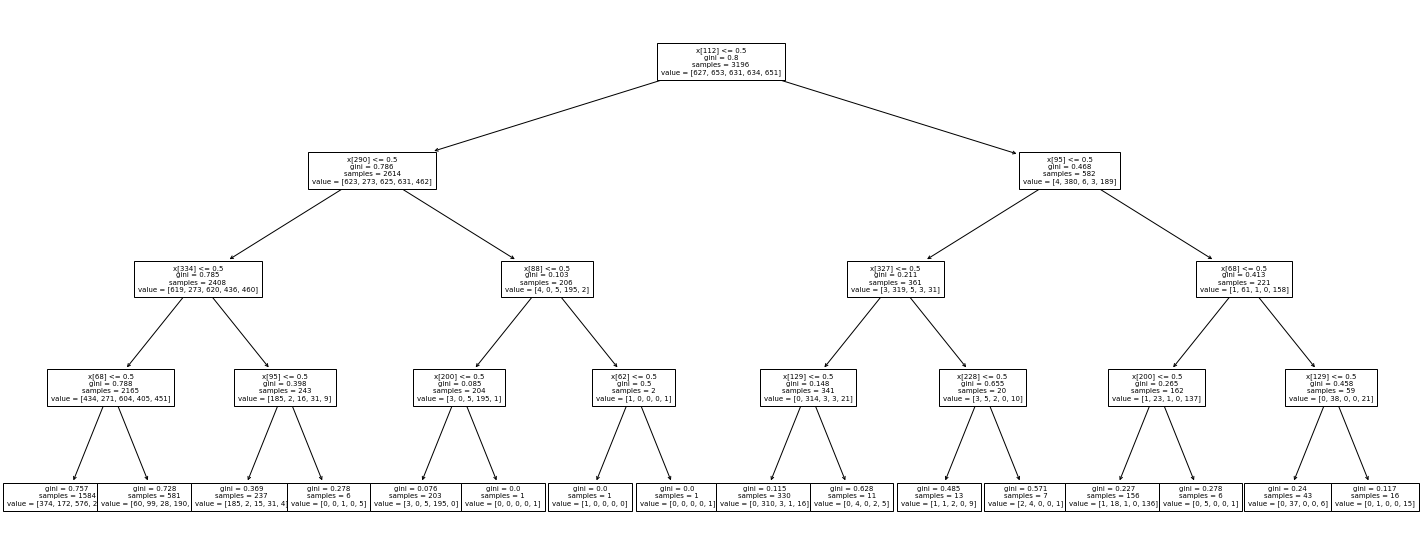

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(clf, fontsize=7);

In [65]:
X.columns[68]

'cayenne'

### Random Forests

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf = RandomForestClassifier(n_estimators=500)

In [78]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [79]:
y_pred = clf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.80      0.77      0.78       172
      indian       0.88      0.93      0.90       146
    japanese       0.86      0.82      0.84       168
      korean       0.84      0.76      0.80       165
        thai       0.78      0.89      0.83       148

    accuracy                           0.83       799
   macro avg       0.83      0.83      0.83       799
weighted avg       0.83      0.83      0.83       799

